In [3]:
import fastai
from fastai.vision.all import *
import os
from PIL import Image
import pandas as pd
import shutil

In [4]:
import geopandas as gpd

In [5]:
import xgboost as xgb
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.metrics import mean_absolute_error as mae ,r2_score ,explained_variance_score,max_error,mean_squared_error,mean_absolute_percentage_error,median_absolute_error,mean_gamma_deviance

In [6]:
import matplotlib.pyplot as plt

In [7]:
xgb_model = xgb.XGBRegressor()

#### Dataset

In [95]:
sls = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/3200_sls.csv")

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#### Data Exploration

<AxesSubplot:ylabel='Frequency'>

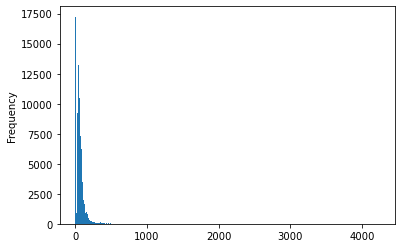

In [49]:
sls.j_kk.plot.hist(bins = 1000)

<AxesSubplot:xlabel='luas', ylabel='j_kk'>

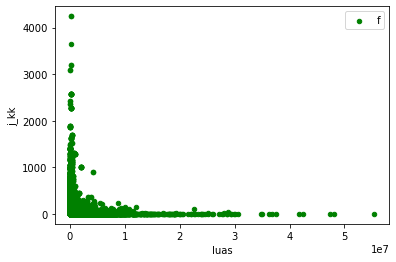

In [50]:
sls.plot(kind='scatter', x='luas',y='j_kk',color = 'Green',label ='f')

klas_ur
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: j_kk, dtype: object

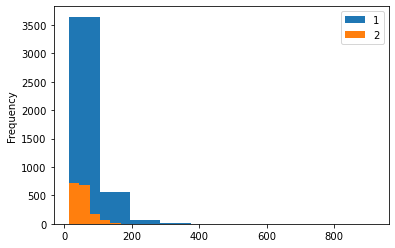

In [51]:
dfg = sls.groupby(['iddesa','klas_ur'])['j_kk'].mean()
dfg.groupby("klas_ur").plot(kind='hist',legend = True)

#### Preprocessing

In [52]:
sls[["j_kk","luas"]].corr()

,j_kk,luas
j_kk,1.000000,-0.069434
luas,-0.069434,1.000000


In [53]:
sls = sls[sls.j_kk >0]

In [54]:
sls.shape

(206517, 66)

In [55]:
xmin = sls.j_kk.min()
xmax = sls.j_kk.max()

In [56]:
bh = []
bh.append(xmin)
l = 16
for h in range(1,l):
    bh.append(xmin*pow((xmax/xmin),(h/l)))
    
bh.append(xmax)

In [57]:
bh.pop(1)
bh.pop(1)
bh.pop(1)
bh.pop(1)
bh.pop(1)
bh.pop(6)

312.00813319034586

In [58]:
bh = [0,
 38.654182375330976,
 50,
 65.1536645170477,
 80,
 109.81994027919605,
 145,
 185.1073055111203,
 4245]

In [59]:
bh1 = bh.copy()
bh2 = bh.copy()

In [60]:
bh1.pop(len(bh)-1)
bh2.pop(0)

0

In [61]:
bins = pd.IntervalIndex.from_arrays(bh1,bh2)
cutter = pd.cut(sls.j_kk, bins)

<AxesSubplot:xlabel='j_kk'>

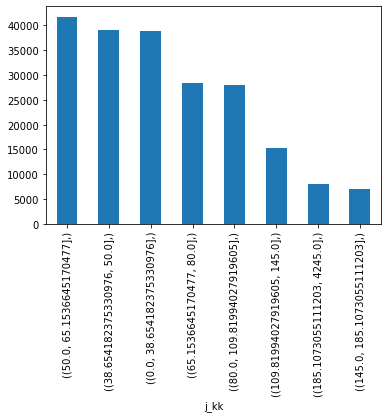

In [62]:
pd.DataFrame(cutter).value_counts().plot(kind='bar')

In [63]:
sls["bin_jk"] = cutter
sls["jk"] = 0

C:\Users\jwst2\AppData\Local\Temp/ipykernel_23604/898828228.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sls["bin_jk"] = cutter
C:\Users\jwst2\AppData\Local\Temp/ipykernel_23604/898828228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sls["jk"] = 0


In [64]:
bins

IntervalIndex([(0.0, 38.654182375330976], (38.654182375330976, 50.0], (50.0, 65.1536645170477], (65.1536645170477, 80.0], (80.0, 109.81994027919605], (109.81994027919605, 145.0], (145.0, 185.1073055111203], (185.1073055111203, 4245.0]], dtype='interval[float64, right]')

In [65]:
j = 1
for i in bins:
    print(j)
    sls.jk[sls.bin_jk == i]= j
    j= j+1

1
2
3
4
5
6
7
8


C:\Users\jwst2\AppData\Local\Temp/ipykernel_23604/3412935534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sls.jk[sls.bin_jk == i]= j
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


<AxesSubplot:xlabel='jk'>

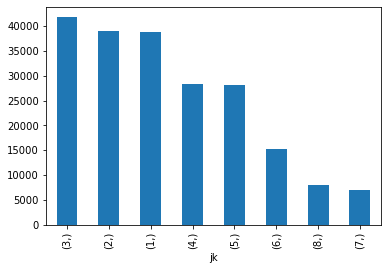

In [66]:
pd.DataFrame(sls.jk).value_counts().plot(kind='bar')

### other aux

In [272]:
gdf_01 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3201_2019_1.shp")
gdf_02 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3202_2019_1.shp")
gdf_03 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3203_2019_1.shp")
gdf_04 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3204_2019_1.shp")
gdf_05 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3205_2019_1.shp")
gdf_06 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3206_2019_1.shp")
gdf_07 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3207_2019_1.shp")
gdf_08 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3208_2019_1.shp")
gdf_09 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3209_2019_1.shp")
gdf_10 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3210_2019_1.shp")
gdf_11 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3211_2019_1.shp")
gdf_12 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3212_2019_1.shp")
gdf_13 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3213_2019_1.shp")
gdf_14 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3214_2019_1.shp")
gdf_15 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3215_2019_1.shp")
gdf_16 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3216_2019_1.shp")
gdf_17 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3217_2019_1.shp")
gdf_18 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3218_2019_1.shp")
gdf_71 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3271_2019_1.shp")
gdf_72 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3272_2019_1.shp")
gdf_73 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3273_2019_1.shp")
gdf_74 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3274_2019_1.shp")
gdf_75 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3275_2019_1.shp")
gdf_76 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3276_2019_1.shp")
gdf_77 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3277_2019_1.shp")
gdf_78 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3278_2019_1.shp")
gdf_79 = gpd.read_file("C:/Users/jwst2/Python/tesis/map/final_sls_3279_2019_1.shp")

In [273]:
gdf_01.shape

(17086, 29)

In [282]:
mypath = 'C:/Users/jwst2/Python/tesis/jpg/JK/02. Sentinel 10M TC SLS'
os.chdir(mypath)
if os.path.isdir('1') is False:
    for i in range(1,9):
        os.makedirs(str(i))
    

In [283]:
yourpath = "C:/Users/jwst2/Python/tesis/jpg/general sls sentinel 10m tc/"
from tqdm import tqdm
for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
    for name in files:
        try :
            if(sls.jk[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 1):
                shutil.copy(os.path.join(root, name), mypath + "/1/"+name)
            elif(sls.jk[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 2):
                shutil.copy(os.path.join(root, name), mypath + "/2/"+name)
            elif(sls.jk[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 3):
                shutil.copy(os.path.join(root, name), mypath + "/3/"+name)
            elif(sls.jk[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 4):
                shutil.copy(os.path.join(root, name), mypath + "/4/"+name)
            elif(sls.jk[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 5):
                shutil.copy(os.path.join(root, name), mypath + "/5/"+name)
            elif(sls.jk[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 6):
                shutil.copy(os.path.join(root, name), mypath + "/6/"+name)
            elif(sls.jk[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 7):
                shutil.copy(os.path.join(root, name), mypath + "/7/"+name)
            elif(sls.jk[sls.iddesa == int(name.replace(".jpg","")[:10])].iloc[0] == 8):
                shutil.copy(os.path.join(root, name), mypath + "/8/"+name)
        except Exception:
            print("Error while copying file : ", name)
            pass 


0it [00:00, ?it/s]

Error while copying file :  32070000002000.jpg
Error while copying file :  32080000002001.jpg
Error while copying file :  32080100006001.jpg
Error while copying file :  32170000006001.jpg


1it [16:41, 1001.41s/it]


In [304]:
split = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/test_set_jk.csv")

In [305]:
split_test= split[["desa"]]

In [306]:
split_test.columns = ["iddesa"]

In [300]:
testpath = 'C:/Users/jwst2/Python/tesis/jpg/JK/test jk sls 10m'
os.chdir(testpath)
if os.path.isdir('1') is False:
    for i in range(1,9):
        os.makedirs(str(i))
 

In [312]:
for i in range(1,9):
    print(i)
    yourpath = "C:/Users/jwst2/Python/tesis/jpg/JK/02. Sentinel 10M TC SLS/" + str(i)
    for root, dirs, files in tqdm(os.walk(yourpath, topdown=False)):
        for name in files:
            try :
                if(split_test.iddesa.astype(str).str.contains(name[:10]).sum() > 0):
                    shutil.move(os.path.join(root, name), "C:/Users/jwst2/Python/tesis/jpg/JK/test jk sls 10m/"+str(i)+"/"+name)
            except Exception:
                print(name)
                pass 

1


1it [00:22, 22.98s/it]


2


1it [00:24, 24.37s/it]


3


1it [00:30, 30.03s/it]


4


1it [00:19, 19.72s/it]


5


1it [00:24, 24.09s/it]


6


1it [00:19, 19.05s/it]


7


1it [00:09,  9.36s/it]


8


1it [00:10, 10.94s/it]


### Deeplearnign

In [9]:
mypath = 'C:/Users/jwst2/Python/tesis/jpg/JK/02. Sentinel 10M TC SLS/'

In [10]:
path = Path.cwd() / (mypath)

In [11]:
Path.BASE_PATH = path
path.ls()

(#8) [Path('1'),Path('2'),Path('3'),Path('4'),Path('5'),Path('6'),Path('7'),Path('8')]

In [12]:
fname = (path/"1").ls()[0]
fname

Path('1/32010100070001.jpg')

In [13]:
img = Image.open(fname)
img

In [14]:
blocks = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, # finds the images in the path
                 splitter=RandomSplitter(0.1,seed=42),  # default random split 80% training, 20% validation
                 get_y=parent_label,
                 item_tfms = Resize(64)) # data augmentation (mult multiplies the default transformation values)

In [15]:
dls = blocks.dataloaders(path)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


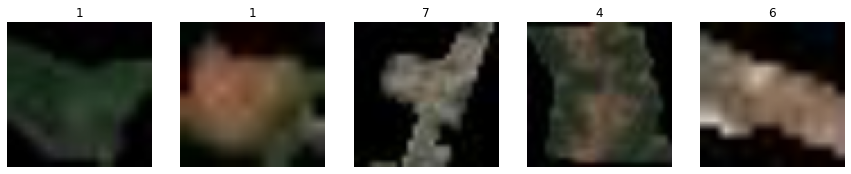

In [16]:
dls.show_batch(nrows=1, ncols=5)

#### Densenet

In [17]:
avg = 'macro'
roca = RocAucBinary(average=avg)
f1s = F1Score(average=avg)
bc = BalancedAccuracy()
metrics=[accuracy,bc, Precision(average=avg), Recall(average=avg), f1s]
learn = cnn_learner(dls, densenet121, metrics=metrics) 

In [18]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,balanced_accuracy_score,precision_score,recall_score,f1_score,time
0,2.053801,1.928549,0.218340,0.192670,0.205986,0.192670,0.176276,13:34
1,1.940273,1.936711,0.227339,0.199787,0.193422,0.199787,0.171991,11:08
2,1.919013,1.989800,0.232618,0.192858,0.210104,0.192858,0.168343,11:05
3,1.889927,1.877031,0.235182,0.207449,0.216034,0.207449,0.188346,11:08
4,1.873708,1.857730,0.245790,0.214149,0.229175,0.214149,0.180563,11:13
5,1.866906,1.860089,0.239706,0.219154,0.241144,0.219154,0.188602,11:20
6,1.838680,1.845650,0.246443,0.209458,0.279710,0.209458,0.184390,11:22
7,1.838469,1.841623,0.251822,0.224051,0.247746,0.224051,0.195280,11:16
8,1.827296,1.840221,0.252727,0.224856,0.231850,0.224856,0.197263,11:32
9,1.824686,1.840414,0.251320,0.227393,0.243562,0.227393,0.201866,11:18


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


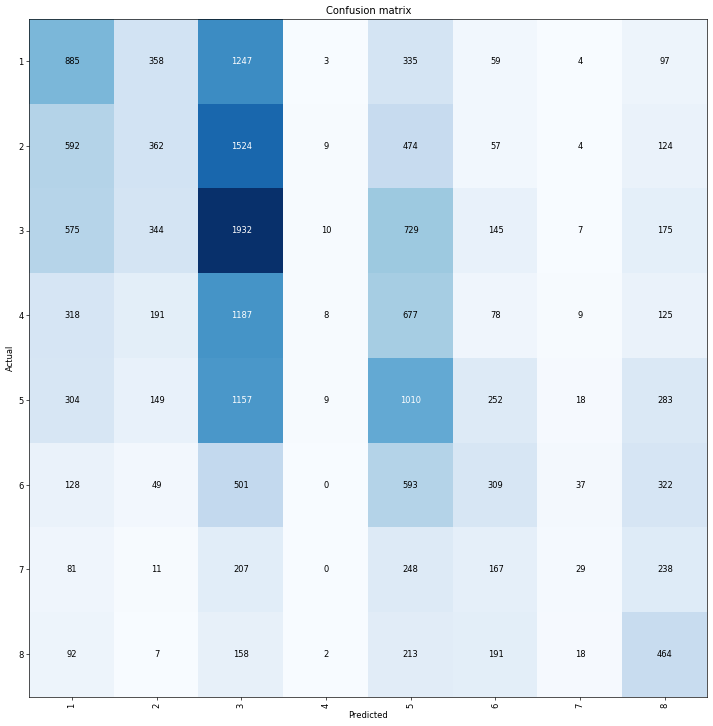

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

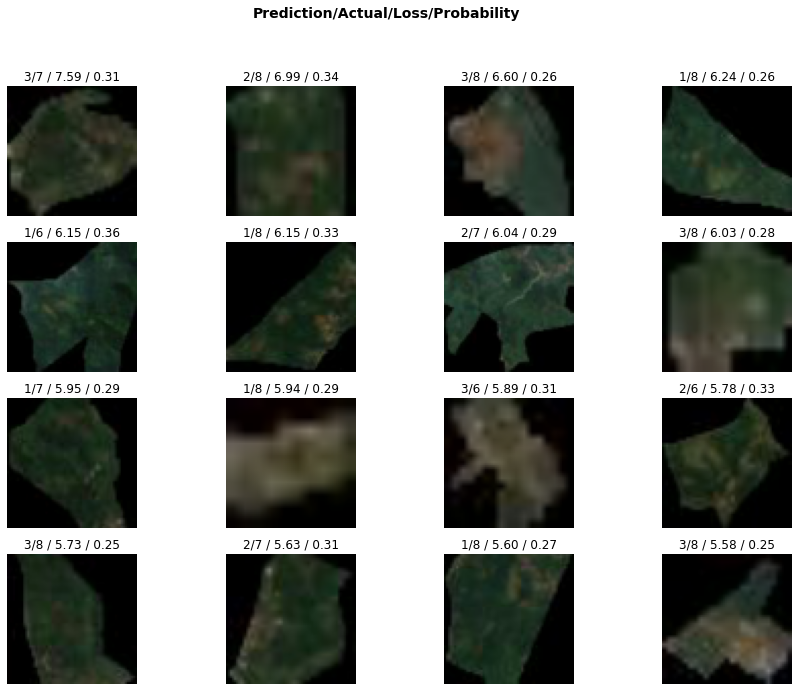

In [23]:
interp.plot_top_losses(16, figsize=(15,11))

In [22]:
learn.export('C:/Users/jwst2/Python/tesis/jumlahkeluarga/models/02. densenet sentinel sls.pkl')

#### Densenet Xgboost Preprocessing

In [28]:
idx_train = []
for i in dls.train.items:
    idx_train.append(str(i)[-18:-4])

In [29]:
idx_valid = []
for i in dls.valid.items:
    idx_valid.append(str(i)[-18:-4])

In [34]:
preds,_ = learn.get_preds(ds_idx  = 0)
result_train = preds.numpy()
new_train = pd.DataFrame(result_train)

preds,_ = learn.get_preds(ds_idx  = 1)
result_test = preds.numpy()
new_test = pd.DataFrame(result_test)


In [128]:
sls = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/3200_sls.csv")
print(sls.shape)
sls = sls.drop_duplicates(subset=['idsls'])
print(sls.shape)

(222861, 66)
(219919, 66)


In [129]:
new_test["idsls"] = idx_valid 
new_train["idsls"] = idx_train 
new_dataset = new_train.append(new_test)
new_dataset.idsls = new_dataset.idsls.apply(int)
new_dataset.shape

(198913, 9)

In [130]:
sls.idsls = sls.idsls.apply(int)
sls.set_index('idsls',inplace = True)
new_dataset.set_index('idsls',inplace=True)
new_dataset.columns = ["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8"]
new_dataset = new_dataset.join(sls,how = "left")

In [134]:
new_dataset = new_dataset[ new_dataset["area"].notna()]

In [ ]:
new_dataset =  new_dataset[["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8","luas","klas_ur","j_kk"]]
new_dataset.columns = ["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8","luas","klas_ur","jk"]


In [138]:
path_pred = Path.cwd() / ("C:/Users/jwst2/Python/tesis/jpg/JK/test jk sls 10m")
test_files = [fn for fn in sorted((path_pred).glob('**/*')) if fn.is_file()]
print(len(test_files))
test_dl = learn.dls.test_dl(test_files)
preds,_ = learn.get_preds(dl  =test_dl)

21017


In [139]:
idx_test = []
for i in test_files:
    idx_test.append(str(i)[-18:-4])

In [147]:
test = pd.DataFrame(preds)
test["idsls"] = idx_test
test.idsls = test.idsls.apply(int)
test.set_index('idsls',inplace=True)
test.columns = ["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8"]
test = test.join(sls,how = "left")
df_test =  test[["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8","luas","klas_ur","j_kk"]]
df_test.columns = ["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8","luas","klas_ur","jk"]

In [155]:
df_test.to_csv("C:/Users/jwst2/Python/tesis/dataset/02. jkk_densenet_sls_sentinel_test.csv")
new_dataset.to_csv("C:/Users/jwst2/Python/tesis/dataset/02. jkk_densenet_sls_sentinel_train.csv")

### Densenet XGBoost Basic

In [162]:
df = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/02. jkk_densenet_sls_sentinel_train.csv")
df_test = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/02. jkk_densenet_sls_sentinel_test.csv")
X = df.drop(["jk","idsls","klas_ur","luas"],axis = 1)
y = df.jk
X= X*100

In [163]:

#brute force scan for all parameters, here are the tricks
#usually max_depth is 6,7,8
#learning rate is around 0.05, but small changes may make big diff
#tuning min_child_weight subsample colsample_bytree can have 
#much fun of fighting against overfit 
#n_estimators is how many round of boosting
#finally, ensemble xgboost with multiple seeds may reduce variance
parameters = { #when use hyperthread, xgboost may become slower
              'learning_rate': [0.05,0.025,0.01], #so called `eta` value
              'max_depth': [3,6,10,15],
              'min_child_weight': [3,5,11],
              'subsample': [0.8                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ,0.9,1],
              'colsample_bytree': [0.7,0.9],
              'n_estimators': [10,50,100,250,500], #number of trees, change it to 1000 for better result
              'use_label_encoder': [False], 
              'objective':['reg:squarederror']
}


clf = GridSearchCV(xgb_model, parameters, cv=10,scoring='neg_mean_squared_error',n_jobs= -1)

clf.fit(X,y)

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3 fits failed out of a total of 10800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\jwst2

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9],
                         'learning_rate': [0.05, 0.025, 0.01],


In [164]:
clf.best_score_

-2444.6905724884423

In [165]:
clf.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 11,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.8,
 'use_label_encoder': False}

In [192]:
clf.best_estimator_.save_model('C:/Users/jwst2/Python/tesis/jumlahkeluarga/models/02. sls sentinel xgboost.json')

In [167]:
X_test =  df_test.iloc[:,1:9]
y_test = df_test.jk
xgb_model = clf.best_estimator_

In [174]:
y_test.min()

0

In [175]:
print("MAE : ", mae(y_test, clf.best_estimator_.predict(X_test*100)))
print("R2 : ",r2_score(y_test, clf.best_estimator_.predict(X_test*100)))
print("Explained Variance : ",explained_variance_score(y_test, clf.best_estimator_.predict(X_test*100)))
print("Max Error :" ,max_error(y_test, clf.best_estimator_.predict(X_test*100)))
print("MSE : ",mean_squared_error(y_test, clf.best_estimator_.predict(X_test*100)))
#print("MGD : ",mean_gamma_deviance(y_test, clf.best_estimator_.predict(X_test*100)))
print("MedAE : ",median_absolute_error(y_test, clf.best_estimator_.predict(X_test*100)))
print("MAPE : ",mean_absolute_percentage_error(y_test, clf.best_estimator_.predict(X_test*100)))


MAE :  26.534740271279933
R2 :  0.34205733962674145
Explained Variance :  0.34332208614559223
Max Error : 741.3521194458008
MSE :  1569.5495698231755
MedAE :  18.356658935546875
MAPE :  1.7894418445107144e+16


###### Estimasi desa

In [186]:
df_test["jk_pred"] = clf.best_estimator_.predict(X_test*100)
df_test["iddesa"] = df_test["idsls"].apply(str).str[0:10]
df_test_desa = df_test.groupby(["iddesa"]).agg({
    'jk' : sum,
    'jk_pred' :sum
    
})

In [191]:
print("MAE : ", mae(df_test_desa.jk, df_test_desa.jk_pred))
print("R2 : ",r2_score(df_test_desa.jk, df_test_desa.jk_pred))
print("Explained Variance : ",explained_variance_score(df_test_desa.jk, df_test_desa.jk_pred))
print("Max Error :" ,max_error(df_test_desa.jk, df_test_desa.jk_pred))
print("MSE : ",mean_squared_error(df_test_desa.jk, df_test_desa.jk_pred))
print("MGD : ",mean_gamma_deviance(df_test_desa.jk, df_test_desa.jk_pred))
print("MedAE : ",median_absolute_error(df_test_desa.jk, df_test_desa.jk_pred))
print("MAPE : ",mean_absolute_percentage_error(df_test_desa.jk, df_test_desa.jk_pred))


MAE :  443.2389129895122
R2 :  0.8968868612364541
Explained Variance :  0.8977474524128809
Max Error : 3905.6884765625
MSE :  451040.08263552096
MGD :  0.068022381468034
MedAE :  294.90625
MAPE :  0.23293871304678426


#### Densenet XGBoost Aux UR Area

In [223]:
df = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/02. jkk_densenet_sls_sentinel_train.csv")
df_test = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/02. jkk_densenet_sls_sentinel_test.csv")
X = df.drop(["jk","idsls"],axis = 1)
y = df.jk
X.iloc[:,0:8]= X.iloc[:,0:8]*100

In [196]:
X

,prob1,prob2,prob3,prob4,prob5,prob6,prob7,prob8,luas,klas_ur
0,12.742034,16.271678,24.256750,19.943233,18.501444,5.719680,1.478475,1.086694,2.451181e+05,2.0
1,11.150613,14.933778,16.485533,18.690076,23.175240,9.522831,3.776919,2.265004,4.757306e+04,1.0
2,7.007933,8.061855,14.633104,8.975782,17.793120,16.883188,10.472260,16.172755,1.172080e+04,1.0
3,21.872158,12.334923,14.035834,11.681873,10.779626,7.825969,9.681629,11.787993,1.032787e+04,1.0
4,17.911210,21.392597,20.569620,13.337620,15.256200,6.403758,3.502902,1.626093,4.081960e+04,1.0
...,...,...,...,...,...,...,...,...,...,...
198894,3.608526,5.077439,8.218037,6.847008,19.820917,18.372442,26.799630,11.255994,9.777322e+05,1.0
198895,28.911266,15.149046,19.117840,7.220431,11.224414,8.604857,4.410737,5.361413,8.658777e+03,1.0
198896,9.530215,12.218498,16.398177,18.425278,20.590398,14.206582,4.710969,3.919888,1.496176e+04,1.0
198897,18.359302,24.422549,19.828987,19.288090,15.660599,2.022598,0.230952,0.186938,8.416692e+04,2.0


In [197]:
clf_aux = GridSearchCV(xgb_model, parameters, cv=5,scoring='neg_mean_squared_error',n_jobs= -1,verbose = 10)
clf_aux.fit(X,y)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.9,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.01, max_delta_step=0,
                                    max_depth=10, min_child_weight=11,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=500, n_...
                                    use_label_encoder=False,
                                    validate_parameters=1, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9],
                         'learning_rate': [0.05, 0.025, 0.01],
          

In [198]:
clf_aux.best_score_

-2308.538868232654

In [199]:
clf_aux.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 11,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.8,
 'use_label_encoder': False}

In [228]:
xgb_model_aux = xgb.XGBRegressor(colsample_bytree= 0.7,
 learning_rate= 0.01,
 max_depth= 10,
 min_child_weight= 11,
 n_estimators= 500,
 objective= 'reg:squarederror',
 subsample= 0.8,
 use_label_encoder= False)


In [229]:
xgb_model_aux.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=11, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [231]:
df_test = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/02. jkk_densenet_sls_sentinel_test.csv")
X_test = df_test.drop(["jk","idsls"],axis = 1)
y_test = df_test.jk
X_test.iloc[:,0:8]= X_test.iloc[:,0:8]*100

In [232]:
print("MAE : ", mae(y_test, xgb_model_aux.predict(X_test)))
print("R2 : ",r2_score(y_test, xgb_model_aux.predict(X_test)))
print("Explained Variance : ",explained_variance_score(y_test, xgb_model_aux.predict(X_test)))
print("Max Error :" ,max_error(y_test, xgb_model_aux.predict(X_test)))
print("MSE : ",mean_squared_error(y_test, xgb_model_aux.predict(X_test)))
#print("MGD : ",mean_gamma_deviance(y_test, xgb_model_aux.predict(X_test)))
print("MedAE : ",median_absolute_error(y_test, xgb_model_aux.predict(X_test)))
print("MAPE : ",mean_absolute_percentage_error(y_test, xgb_model_aux.predict(X_test)))

MAE :  25.321838561276554
R2 :  0.39405022356372554
Explained Variance :  0.39542403988856845
Max Error : 744.5919609069824
MSE :  1445.5183836239646
MedAE :  17.712169647216797
MAPE :  1.4907441742636414e+16


##### Estimasi desa

In [233]:
df_test["jk_pred"] = xgb_model_aux.predict(X_test)
df_test["iddesa"] = df_test["idsls"].apply(str).str[0:10]
df_test_desa = df_test.groupby(["iddesa"]).agg({
    'jk' : sum,
    'jk_pred' :sum
    
})

In [234]:
print("MAE : ", mae(df_test_desa.jk, df_test_desa.jk_pred))
print("R2 : ",r2_score(df_test_desa.jk, df_test_desa.jk_pred))
print("Explained Variance : ",explained_variance_score(df_test_desa.jk, df_test_desa.jk_pred))
print("Max Error :" ,max_error(df_test_desa.jk, df_test_desa.jk_pred))
print("MSE : ",mean_squared_error(df_test_desa.jk, df_test_desa.jk_pred))
print("MGD : ",mean_gamma_deviance(df_test_desa.jk, df_test_desa.jk_pred))
print("MedAE : ",median_absolute_error(df_test_desa.jk, df_test_desa.jk_pred))
print("MAPE : ",mean_absolute_percentage_error(df_test_desa.jk, df_test_desa.jk_pred))


MAE :  436.95484849945836
R2 :  0.906528542224562
Explained Variance :  0.9074633495494693
Max Error : 3133.4912109375
MSE :  408865.19937846164
MGD :  0.06715034964305804
MedAE :  303.840087890625
MAPE :  0.23033611931969086


#### Densenet XGBoost Aux UR

In [235]:
df = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/02. jkk_densenet_sls_sentinel_train.csv")
df_test = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/02. jkk_densenet_sls_sentinel_test.csv")
X = df.drop(["jk","idsls","luas"],axis = 1)
y = df.jk
X.iloc[:,0:8]= X.iloc[:,0:8]*100

In [214]:
clf_auxur = GridSearchCV(xgb_model, parameters, cv=5,scoring='neg_mean_squared_error',n_jobs= -1,verbose= 100)
clf_auxur.fit(X,y)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=0.9,
                                    enable_categorical=False, gamma=0,
                                    gpu_id=-1, importance_type=None,
                                    interaction_constraints='',
                                    learning_rate=0.01, max_delta_step=0,
                                    max_depth=10, min_child_weight=11,
                                    missing=nan, monotone_constraints='()',
                                    n_estimators=500, n_...
                                    use_label_encoder=False,
                                    validate_parameters=1, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9],
                         'learning_rate': [0.05, 0.025, 0.01],
          

In [215]:
clf_auxur.best_score_

-2436.9983871923955

In [216]:
clf_auxur.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.01,
 'max_depth': 10,
 'min_child_weight': 11,
 'n_estimators': 500,
 'objective': 'reg:squarederror',
 'subsample': 0.8,
 'use_label_encoder': False}

In [236]:
xgb_model_auxur = xgb.XGBRegressor(colsample_bytree= 0.9,
 learning_rate= 0.01,
 max_depth= 10,
 min_child_weight= 11,
 n_estimators= 500,
 objective= 'reg:squarederror',
 subsample= 0.8,
 use_label_encoder= False)
xgb_model_auxur.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.9, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=11, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', use_label_encoder=False,
             validate_parameters=1, verbosity=None)

In [237]:
X_test = df_test.drop(["jk","idsls","luas"],axis = 1)
y_test = df_test.jk
X_test.iloc[:,0:8]= X_test.iloc[:,0:8]*100

In [238]:
print("MAE : ", mae(y_test, clf_auxur.best_estimator_.predict(X_test)))
print("R2 : ",r2_score(y_test, clf_auxur.best_estimator_.predict(X_test)))
print("Explained Variance : ",explained_variance_score(y_test, clf_auxur.best_estimator_.predict(X_test)))
print("Max Error :" ,max_error(y_test, clf_auxur.best_estimator_.predict(X_test)))
print("MSE : ",mean_squared_error(y_test, clf_auxur.best_estimator_.predict(X_test)))
#print("MGD : ",mean_gamma_deviance(y_test, clf_auxur.best_estimator_.predict(X_test)))
print("MedAE : ",median_absolute_error(y_test, clf_auxur.best_estimator_.predict(X_test)))
print("MAPE : ",mean_absolute_percentage_error(y_test, clf_auxur.best_estimator_.predict(X_test)))

MAE :  26.503005900902327
R2 :  0.34380351105234697
Explained Variance :  0.34509313794952323
Max Error : 740.3397521972656
MSE :  1565.384005291546
MedAE :  18.455108642578125
MAPE :  1.7872450317113646e+16


##### Estimasi desa

In [239]:
df_test["jk_pred"] = clf_auxur.best_estimator_.predict(X_test)
df_test["iddesa"] = df_test["idsls"].apply(str).str[0:10]
df_test_desa = df_test.groupby(["iddesa"]).agg({
    'jk' : sum,
    'jk_pred' :sum
    
})

In [240]:
print("MAE : ", mae(df_test_desa.jk, df_test_desa.jk_pred))
print("R2 : ",r2_score(df_test_desa.jk, df_test_desa.jk_pred))
print("Explained Variance : ",explained_variance_score(df_test_desa.jk, df_test_desa.jk_pred))
print("Max Error :" ,max_error(df_test_desa.jk, df_test_desa.jk_pred))
print("MSE : ",mean_squared_error(df_test_desa.jk, df_test_desa.jk_pred))
print("MGD : ",mean_gamma_deviance(df_test_desa.jk, df_test_desa.jk_pred))
print("MedAE : ",median_absolute_error(df_test_desa.jk, df_test_desa.jk_pred))
print("MAPE : ",mean_absolute_percentage_error(df_test_desa.jk, df_test_desa.jk_pred))


MAE :  441.8292428152902
R2 :  0.8971457585848129
Explained Variance :  0.8980232793563498
Max Error : 3835.1435546875
MSE :  449907.6073486842
MGD :  0.06734103510732581
MedAE :  283.352294921875
MAPE :  0.2296357507888938


## Resnet

In [241]:
learn_rs = cnn_learner(dls, resnet50, metrics=metrics) 

In [242]:
learn_rs.fit_one_cycle(10)

RuntimeError: CUDA error: unknown error
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

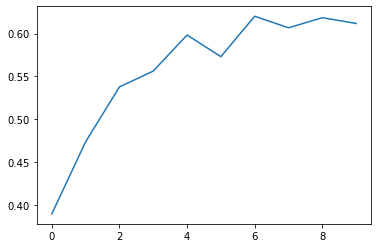

In [298]:
plt.plot(L(learn_rs.recorder.values).itemgot(2));

C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


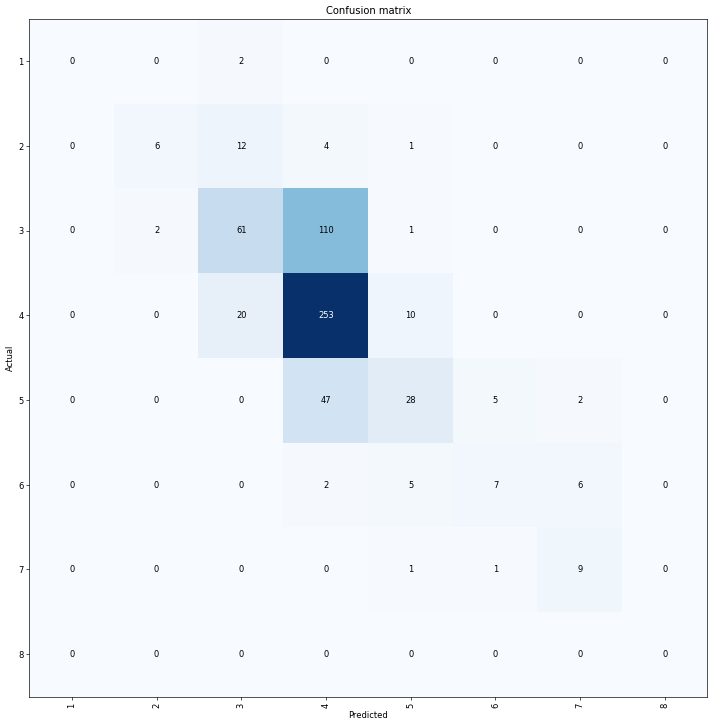

In [299]:
interp = ClassificationInterpretation.from_learner(learn_rs)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [300]:
learn_rs.export('C:/Users/jwst2/Python/tesis/jumlahkeluarga/models/01. resnet sentinel desa.pkl')

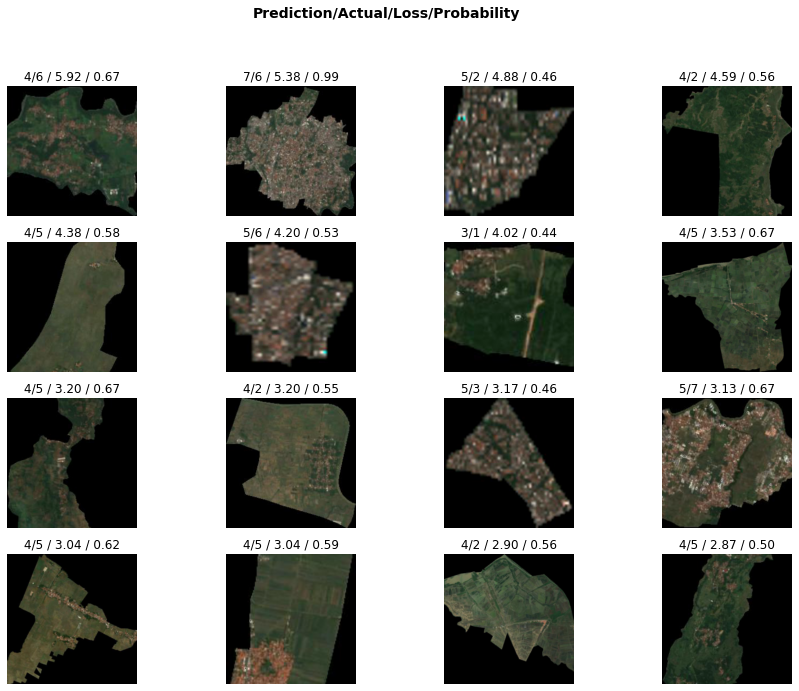

In [301]:
interp.plot_top_losses(16, figsize=(15,11))

#### Resnet XGBoost

In [302]:
preds,_ = learn_rs.get_preds(ds_idx  = 0)
result_train = preds.numpy()
new_train = pd.DataFrame(result_train)

preds,_ = learn_rs.get_preds(ds_idx  = 1)
result_test = preds.numpy()
new_test = pd.DataFrame(result_test)


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\jwst2\anaconda3\envs\datasc\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [303]:
new_test["iddesa"] = idx_valid 
new_train["iddesa"] = idx_train 
df_pred =  new_test
df_pred.iddesa = df_pred.iddesa.apply(int)
df_pred.set_index('iddesa',inplace=True)
df_pred.columns = ["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8"]
df_test = df_pred.join(desa)
df_test =  df_test[["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8","luas","klas_ur","j_kk"]]
df_test.columns = ["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8","luas","klas_ur","jk"]
new_train.iddesa = new_train.iddesa.apply(int)
df = new_train.set_index('iddesa').join(desa)
df = df[[0,1,2,3,4,5,6,7,"luas","klas_ur","j_kk"]]
df.columns = ["prob1","prob2","prob3","prob4","prob5","prob6","prob7","prob8","luas","klas_ur","jk"]
df.to_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_train.csv")
df_test.to_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_test.csv")

In [304]:
df_test.head()

,prob1,prob2,prob3,prob4,prob5,prob6,prob7,prob8,luas,klas_ur,jk
iddesa,,,,,,,,,,,
3217120011,0.000068,0.001607,0.043390,0.576655,0.354097,0.023922,0.000222,0.000039,3.167638e+06,1,3324
3203130003,0.000057,0.010919,0.202436,0.716413,0.068747,0.001388,0.000029,0.000012,4.775346e+06,1,1487
3212220002,0.000011,0.002590,0.085589,0.558191,0.328540,0.024552,0.000427,0.000099,5.141961e+06,1,2624
3204300004,0.000130,0.019048,0.541515,0.419206,0.019568,0.000463,0.000043,0.000026,1.987794e+07,1,1813
3201161010,0.000007,0.001420,0.063542,0.562964,0.362027,0.008137,0.001851,0.000053,1.850622e+07,2,2558


#### Resnet XGBoost Basic

In [308]:
df = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_train.csv")
df_test = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_test.csv")
X = df.drop(["jk","iddesa","klas_ur","luas"],axis = 1)
y = df.jk
X= X*100

In [310]:
clf_rs = GridSearchCV(xgb_model, parameters, cv=10,scoring='neg_mean_squared_error',n_jobs= -1)
clf_rs.fit(X,y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9],
                         'learning_rate': [0.05, 0.025, 0.01],


In [315]:
clf_rs.best_score_

-3774644.8225290505

In [316]:
clf_rs.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 1,
 'use_label_encoder': False}

In [317]:
clf_rs.best_estimator_.save_model('C:/Users/jwst2/Python/tesis/jumlahkeluarga/models/01. desa sentinel resnet xgboost.json')

In [319]:
X_test = df_test.drop(["jk","iddesa","klas_ur","luas"],axis = 1)
y_test = df_test.jk
X_test=X_test*100

In [320]:
xgtemp = clf_rs.best_estimator_

In [321]:
print("MAE : ", mae(y_test, xgtemp.predict(X_test)))
print("R2 : ",r2_score(y_test, xgtemp.predict(X_test)))
print("Explained Variance : ",explained_variance_score(y_test, xgtemp.predict(X_test)))
print("Max Error :" ,max_error(y_test, xgtemp.predict(X_test)))
print("MSE : ",mean_squared_error(y_test, xgtemp.predict(X_test)))
print("MGD : ",mean_gamma_deviance(y_test, xgtemp.predict(X_test)))
print("MedAE : ",median_absolute_error(y_test, xgtemp.predict(X_test)))
print("MAPE : ",mean_absolute_percentage_error(y_test, xgtemp.predict(X_test)))

MAE :  707.3767227301076
R2 :  0.7279821684258025
Explained Variance :  0.7292274519098136
Max Error : 10900.470703125
MSE :  1652665.8186228264
MGD :  0.14073223709703614
MedAE :  434.499267578125
MAPE :  0.35885985677914045


#### Resnet XGBoost Aux Ur

In [325]:
df = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_train.csv")
df_test = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_test.csv")
X = df.drop(["jk","iddesa","luas"],axis = 1)
y = df.jk
X.iloc[:,0:8]= X.iloc[:,0:8]*100

In [326]:
clf_rs_auxur = GridSearchCV(xgb_model, parameters, cv=10,scoring='neg_mean_squared_error',n_jobs= -1)
clf_rs_auxur.fit(X,y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9],
                         'learning_rate': [0.05, 0.025, 0.01],


In [327]:
clf_rs_auxur.best_score_

-3762444.9104818963

In [328]:
clf_rs_auxur.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 11,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.9,
 'use_label_encoder': False}

In [329]:
clf_rs_auxur.best_estimator_.save_model('C:/Users/jwst2/Python/tesis/jumlahkeluarga/models/01. desa sentinel resnet xgboost auxur.json')

In [330]:
X_test = df_test.drop(["jk","iddesa","luas"],axis = 1)
y_test = df_test.jk
X_test.iloc[:,0:8]=X_test.iloc[:,0:8]*100

In [333]:
xgtemp = clf_rs_auxur.best_estimator_

In [334]:
print("MAE : ", mae(y_test, xgtemp.predict(X_test)))
print("R2 : ",r2_score(y_test, xgtemp.predict(X_test)))
print("Explained Variance : ",explained_variance_score(y_test, xgtemp.predict(X_test)))
print("Max Error :" ,max_error(y_test, xgtemp.predict(X_test)))
print("MSE : ",mean_squared_error(y_test, xgtemp.predict(X_test)))
print("MGD : ",mean_gamma_deviance(y_test, xgtemp.predict(X_test)))
print("MedAE : ",median_absolute_error(y_test, xgtemp.predict(X_test)))
print("MAPE : ",mean_absolute_percentage_error(y_test, xgtemp.predict(X_test)))

MAE :  689.119663680902
R2 :  0.7340956300199399
Explained Variance :  0.7353429872507011
Max Error : 11126.431640625
MSE :  1615522.9998905975
MGD :  0.13400373829422957
MedAE :  418.5484619140625
MAPE :  0.3471067823867917


#### Resnet XGBoost Aux Ur Area

In [335]:
df = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_train.csv")
df_test = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_test.csv")
X = df.drop(["jk","iddesa"],axis = 1)
y = df.jk
X.iloc[:,0:8]= X.iloc[:,0:8]*100

In [336]:
clf_rs_aux = GridSearchCV(xgb_model, parameters, cv=10,scoring='neg_mean_squared_error',n_jobs= -1)
clf_rs_aux.fit(X,y)

GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,...
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.7, 0.9],
                         'learning_rate': [0.05, 0.025, 0.01],


In [337]:
clf_rs_aux.best_score_

-3580215.691146633

In [338]:
clf_rs_aux.best_params_

{'colsample_bytree': 0.9,
 'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 100,
 'objective': 'reg:squarederror',
 'subsample': 0.9,
 'use_label_encoder': False}

In [339]:
clf_rs_aux.best_estimator_.save_model('C:/Users/jwst2/Python/tesis/jumlahkeluarga/models/01. desa sentinel resnet xgboost aux.json')

In [340]:
X_test = df_test.drop(["jk","iddesa"],axis = 1)
y_test = df_test.jk
X_test.iloc[:,0:8]=X_test.iloc[:,0:8]*100

In [341]:
xgtemp = clf_rs_aux.best_estimator_

In [342]:
print("MAE : ", mae(y_test, xgtemp.predict(X_test)))
print("R2 : ",r2_score(y_test, xgtemp.predict(X_test)))
print("Explained Variance : ",explained_variance_score(y_test, xgtemp.predict(X_test)))
print("Max Error :" ,max_error(y_test, xgtemp.predict(X_test)))
print("MSE : ",mean_squared_error(y_test, xgtemp.predict(X_test)))
print("MGD : ",mean_gamma_deviance(y_test, xgtemp.predict(X_test)))
print("MedAE : ",median_absolute_error(y_test, xgtemp.predict(X_test)))
print("MAPE : ",mean_absolute_percentage_error(y_test, xgtemp.predict(X_test)))

MAE :  694.3427547679228
R2 :  0.7529837981659775
Explained Variance :  0.7539183381301846
Max Error : 8911.7919921875
MSE :  1500766.4426064403
MGD :  0.13386696807673296
MedAE :  431.7608642578125
MAPE :  0.34881491135795967


#### Data review

In [344]:
df = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_train.csv")
df_test = pd.read_csv("C:/Users/jwst2/Python/tesis/dataset/01. jkk_resnet_desa_sentinel_test.csv")
df = df.append(df_test)

array([<AxesSubplot:title={'center':'1'}>,
       <AxesSubplot:title={'center':'2'}>], dtype=object)

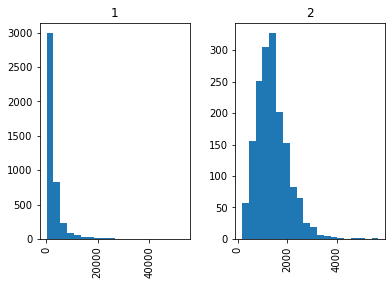

In [361]:
df['jk'].hist(by=df['klas_ur'],bins = 20)

<AxesSubplot:xlabel='luas', ylabel='jk'>

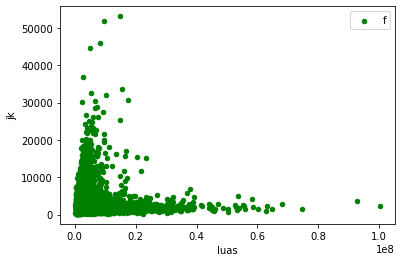

In [351]:
df.plot(kind='scatter', x='luas',y='jk',color = 'Green',label ='f')

,jk,luas
jk,1.000000,-0.026784
luas,-0.026784,1.000000


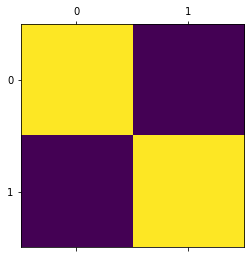